Thévenin and Norton Theorem
===========================

The Thévenin\'s theorem holds that:

> -   Any linear electrical network with voltage and current sources and
>     only resistances can be replaced at terminals A-B by an equivalent
>     voltage source Vth in series connection with an equivalent
>     resistance Rth.
> -   This equivalent voltage Vth is the voltage obtained at terminals
>     A-B of the network with terminals A-B open circuited.
> -   This equivalent resistance Rth is the resistance obtained at
>     terminals A-B of the network with all its independent current
>     sources open circuited and all its independent voltage sources
>     short circuited.

The Norton\'s theorem holds that:

> -   Any linear electrical network with voltage and current sources and
>     only resistances can be replaced at terminals A-B by an equivalent
>     current source INO in parallel connection with an equivalent
>     resistance Rno.
> -   This equivalent current Ino is the current obtained at terminals
>     A-B of the network with terminals A-B short circuited.
> -   This equivalent resistance Rno is the resistance obtained at
>     terminals A-B of the network with all its voltage sources short
>     circuited and all its current sources open circuited.

The Norton\'s theorem is the dual of the Thévenin\'s therorem and both
are related by these equations:

> $$\begin{aligned}
> \begin{align}
>   R_{no} & = R_{th} \\
>   I_{no} & = V_{th} / R_{th} \\
>   V_{th} & = I_{No} R_{no}
> \end{align}
> \end{aligned}$$


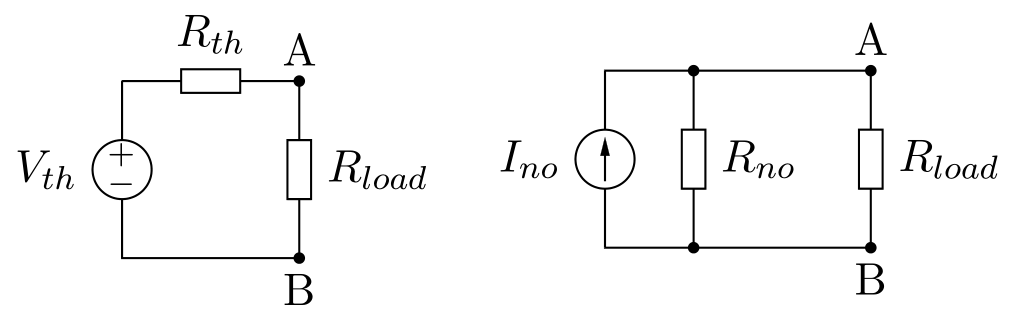

In circuit theory terms, these theorems allows any one-port network to
be reduced to a single voltage or current source and a single impedance.

For AC circuits these theorems can be applied to reactive impedances as
well as resistances.


In [ ]:


import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()


from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *


thevenin_circuit = Circuit('Thévenin Representation')

thevenin_circuit.V('input', 1, thevenin_circuit.gnd, 10@u_V)
thevenin_circuit.R('generator', 1, 'load', 10@u_Ω)
thevenin_circuit.R('load', 'load', thevenin_circuit.gnd, 1@u_kΩ)

simulator = thevenin_circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.operating_point()

load_node = analysis.load
print('Node {}: {:5.2f} V'.format(str(load_node), float(load_node)))


Node load:  9.90 V


In [ ]:

norton_circuit = Circuit('Norton Representation')

norton_circuit.I('input', norton_circuit.gnd, 'load',
                 thevenin_circuit.Vinput.dc_value/thevenin_circuit.Rgenerator.resistance)
norton_circuit.R('generator', 'load', norton_circuit.gnd, thevenin_circuit.Rgenerator.resistance)
norton_circuit.R('load', 'load', norton_circuit.gnd, thevenin_circuit.Rload.resistance)

simulator = norton_circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.operating_point()

load_node = analysis.load
print('Node {}: {:5.2f} V'.format(str(load_node), float(load_node)))


Node load:  9.90 V
